# $$ Hiring Process Analytics $$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
# import, open and view the dataset 
data=pd.read_csv(r"C:\Users\Dell\Downloads\Statics.csv",parse_dates=["Interview Taken on"])
data

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


In [7]:
# understand the structure(dimension) of dataset i.e: size,row,columns
print(data.size) #prints the size of dataset
row,col = data.shape #assigns the row and column to variable row,col
print("Total Rows are : ",row)
print("Total Columns are :",col)

50176
Total Rows are :  7168
Total Columns are : 7


In [8]:
# describe the columns of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   application_id      7168 non-null   int64         
 1   Interview Taken on  7168 non-null   datetime64[ns]
 2   Status              7168 non-null   object        
 3   event_name          7168 non-null   object        
 4   Department          7168 non-null   object        
 5   Post Name           7168 non-null   object        
 6   Offered Salary      7167 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 392.1+ KB


In [9]:
# gather all the object type columns
o_data = data.select_dtypes('object')
o_data

,Status,event_name,Department,Post Name
0,Hired,Male,Service Department,c8
1,Hired,Female,Service Department,c5
2,Rejected,Male,Service Department,c5
3,Rejected,Female,Operations Department,i4
4,Hired,Male,Operations Department,i4
...,...,...,...,...
7163,Hired,Male,Service Department,c9
7164,Hired,Female,Service Department,c5
7165,Hired,Male,Service Department,c5
7166,Rejected,Male,Service Department,c5


In [10]:
# gather all the numerical column from the dataset
n_data = data.select_dtypes(['int64','float64'])
n_data

,application_id,Offered Salary
0,383422,56553.0
1,907518,22075.0
2,176719,70069.0
3,429799,3207.0
4,253651,29668.0
...,...,...
7163,493131,49282.0
7164,214261,57742.0
7165,932441,69932.0
7166,39010,14489.0


In [11]:
# Since some of the column names in the dataset may cause problem in the analysis it is necessary to keep standard type/format
# in the column name which can be done as,
data.rename(columns={"Interview Taken on":"Interview_Taken_on","Post Name":"Post_Name","Offered Salary":"Offered_Salary"},
           inplace = True)
data

,application_id,Interview_Taken_on,Status,event_name,Department,Post_Name,Offered_Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


In [12]:
#data cleaning
#replacing the not available salary values with the mean of salary values available
data.fillna({"Offered_Salary":data["Offered_Salary"].mean()},inplace=True)

In [13]:
#check if any column of dataset contains null values
data.isnull().sum()

application_id        0
Interview_Taken_on    0
Status                0
event_name            0
Department            0
Post_Name             0
Offered_Salary        0
dtype: int64

In [14]:
#learn and understand the column using the given command
data["Offered_Salary"].describe()

count      7168.000000
mean      49983.029022
std       28852.163831
min         100.000000
25%       25463.750000
50%       49628.000000
75%       74429.000000
max      400000.000000
Name: Offered_Salary, dtype: float64

In [15]:
#remove the duplicate/repeated values in the dataset
data.drop_duplicates(subset="application_id",keep="first",inplace=True)
#check if all the duplicate values are removed 
data["application_id"].duplicated().sum()

0

In [16]:
#after all the corrections the final dataset looks like,
data

,application_id,Interview_Taken_on,Status,event_name,Department,Post_Name,Offered_Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


In [17]:
#calculating the status count in dataset
data.Status.value_counts()

Hired       4679
Rejected    2462
Name: Status, dtype: int64

In [18]:
#dropping the rows in dataset where event name is invalid/'-'
data.drop(data[data["event_name"]=="-"].index,inplace=True)
data.event_name.value_counts()

Male                 4070
Female               2664
Don’t want to say     392
Name: event_name, dtype: int64

In [19]:
# Differentiating salary based on mean,minimum and maximum for each post 
data.groupby(["Post_Name"]).Offered_Salary.agg(["mean","min","max"])

,mean,min,max
Post_Name,,,
-,85914.000000,85914.0,85914.0
b9,49847.287912,1105.0,200000.0
c-10,51244.359307,1817.0,99891.0
c5,50241.313003,1038.0,99948.0
c8,50747.257862,1035.0,99967.0
c9,50210.546884,1007.0,99953.0
i1,49937.954545,1519.0,99939.0
i4,48877.840909,1212.0,400000.0
i5,49467.559949,1304.0,98926.0


In [20]:
# Total Post Count on the basis of Post_Name

data.Post_Name.value_counts()

c9      1781
c5      1738
i7       976
i5       784
i6       527
b9       455
c8       318
c-10     231
i1       220
i4        88
m6         3
-          1
n10        1
m7         1
n9         1
n6         1
Name: Post_Name, dtype: int64

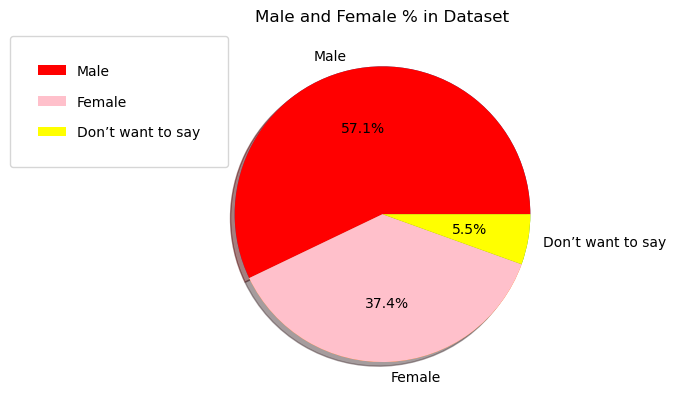

In [21]:
#Total males and females in the dataset
Gender="Male","Female","Don’t want to say"
total=data.event_name.value_counts()
colors=["Red","Pink","Yellow"]
explode=(0,0,0)
plt.pie(total)
explode=(0,0,0)
plt.pie(total,explode=explode,labels=Gender,colors=colors,autopct='%1.1f%%',shadow=True,startangle=360)
plt.title('Male and Female % in Dataset')
plt.legend(loc="upper right",handlelength=2, borderpad=2, labelspacing=1.2,bbox_to_anchor=(0.1, 1))
plt.show()

***
## $$ Task - 1 $$

**Hiring :** Process of intaking of people into an organization for different kinds of positions. \
**Your Task :** How  many males and females are hired ?
***

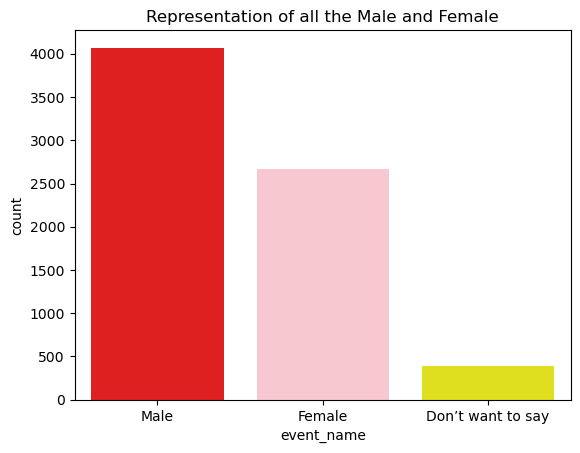

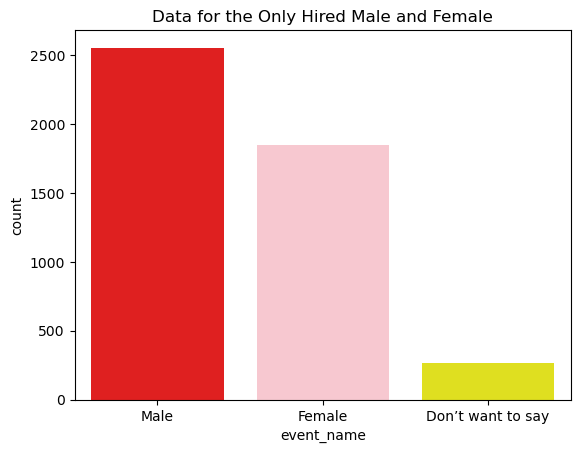

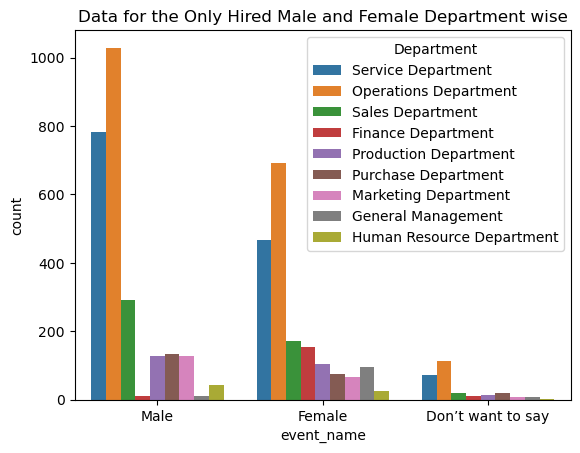

In [22]:
#Plotting data for all Male and Female.

plt.title("Representation of all the Male and Female")
p=["Red","Pink","Yellow"]
sns.countplot(x =data.event_name, data = data,palette=p)
plt.show()

# Filtering only Hired People and plotting it
c=data[data["Status"]=="Hired"]
plt.title("Data for the Only Hired Male and Female")
sns.countplot(x =c.event_name, data = data,palette=p)
plt.show()

# According to Department
c=data[data["Status"]=="Hired"]
plt.title("Data for the Only Hired Male and Female Department wise")
sns.countplot(x =c.event_name, data = data,hue="Department")
plt.show()

***
## $$ Task - 2 $$

**Average Salary :** Adding all the salaries for a selected group of employees and then dividing the sum by the number of employees in the group. \
**Your Task :** What is the average salaries offered in this company ?
***

In [23]:
df=data.groupby(["Post_Name"]).Offered_Salary.agg(["mean"])
df.rename(columns={"mean":"Average_Salary"},inplace=True)
df

,Average_Salary
Post_Name,
-,85914.000000
b9,49847.287912
c-10,51244.359307
c5,50241.313003
c8,50747.257862
c9,50210.546884
i1,49937.954545
i4,48877.840909
i5,49467.559949


In [24]:
df.max() #this will provide the maximum salary offered for an post 

Average_Salary    85914.0
dtype: float64

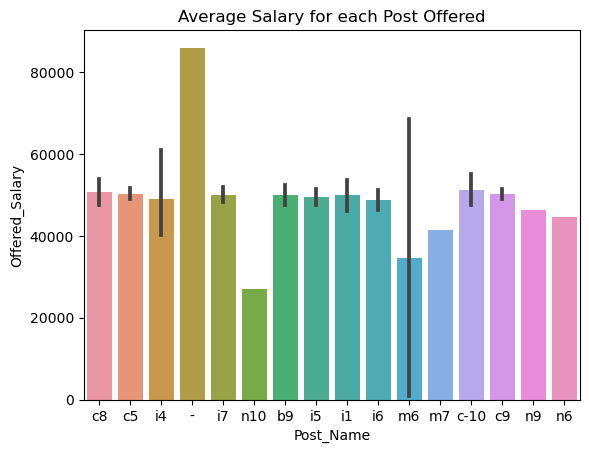

In [25]:
#plotting average salary for all the post's provided in the dataset
plt.title("Average Salary for each Post Offered")
z=data.Post_Name
zp=data.groupby(["Post_Name"]).Offered_Salary.mean()
sns.barplot(x=data.Post_Name,y=data.Offered_Salary,data=data)
plt.show()

***
## $$ Task - 3 $$

**Class Interval :** The class interview is the difference between the upper class limit and the lower data limit. \
**Your Task :** Draw the class interval for salary in the company ?
***

In [30]:
#try understanding all the statistical aspects of salaries 
data["Offered_Salary"].describe()

count      7126.000000
mean      50018.106515
std       28828.268238
min         800.000000
25%       25605.750000
50%       49658.500000
75%       74418.500000
max      400000.000000
Name: Offered_Salary, dtype: float64

<Figure size 800x600 with 0 Axes>

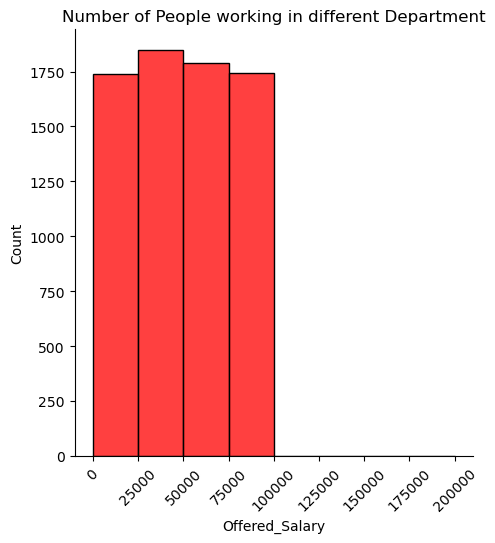

In [27]:
#plotting an figure consisting of number of people working at different salary ranges 
plt.figure(figsize=(8,6))
sns.displot(data["Offered_Salary"],bins=[0,25000,50000,75000,100000,125000,150000,175000,200000],color="red")
plt.title("Number of People working in different Department")
locs,labels=plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

***
## $$ Task - 4 $$

**Charts and Plots** : This is one of the most important part of analysis to visualize the data.  
**Your Task :** Draw Pie Chart / Bar Graph tp show proportion of people working different department.
***

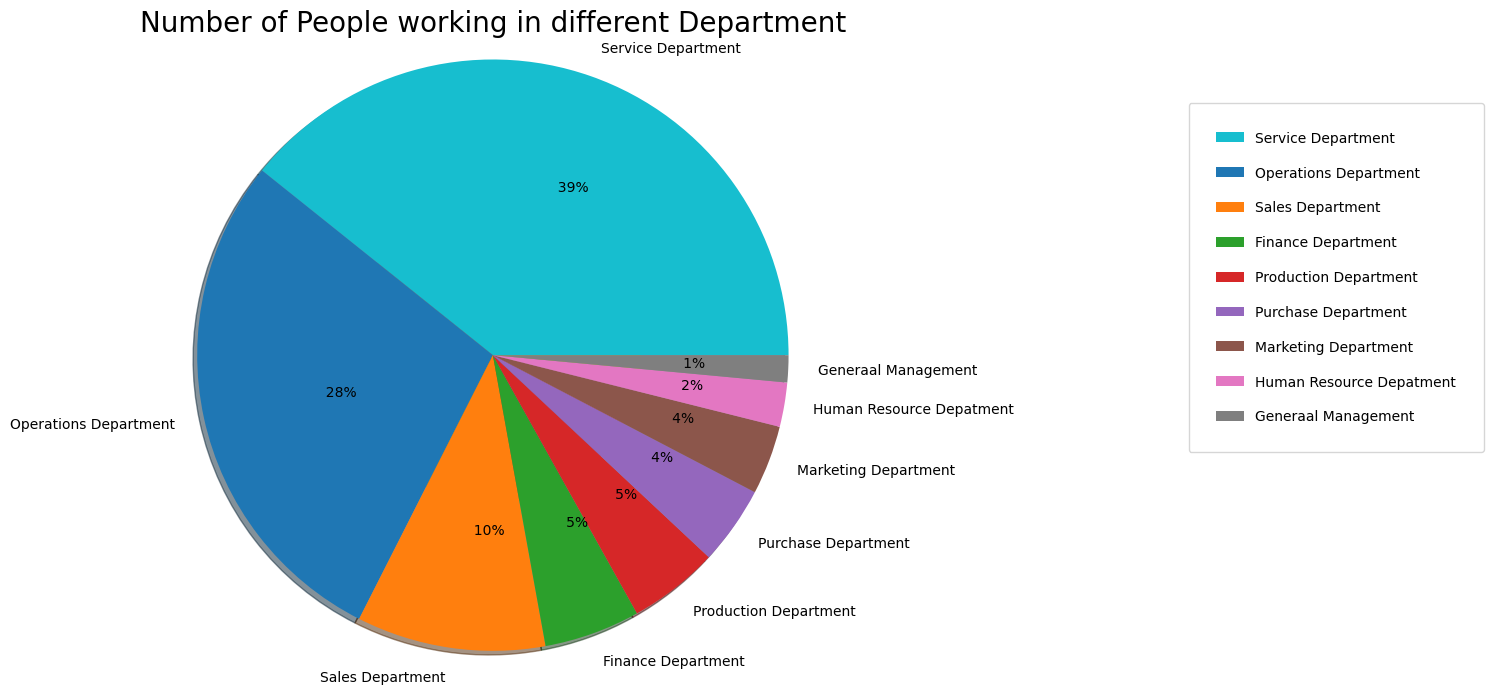

In [28]:
#plotting an pie chart to show the percentage of people working in different departments 
Dep=["Service Department","Operations Department","Sales Department","Finance Department",
     "Production Department","Purchase Department","Marketing Department", "Human Resource Depatment",
     "Generaal Management"]     
total=c.Department.value_counts()
explode=(0,0,0,0,0,0,0,0,0)
plt.pie(total)
explode=(0,0,0,0,0,0,0,0,0)
plt.pie(total,explode=explode,labels=Dep,autopct='%12.0f%%',shadow=True,radius = 2,startangle=360)
plt.title('Number of People working in different Department',fontsize = 20,pad=100.0)
plt.legend(loc="upper right",handlelength=2, borderpad=2, labelspacing=1.5,bbox_to_anchor=(3.2,1.2))
plt.show()

***
## $$ Task - 5 $$

**Charts :** Use different charts and graphs to perform the task representing the data. \
**Your Task :** Represent different post tiers using charts/graph?
***

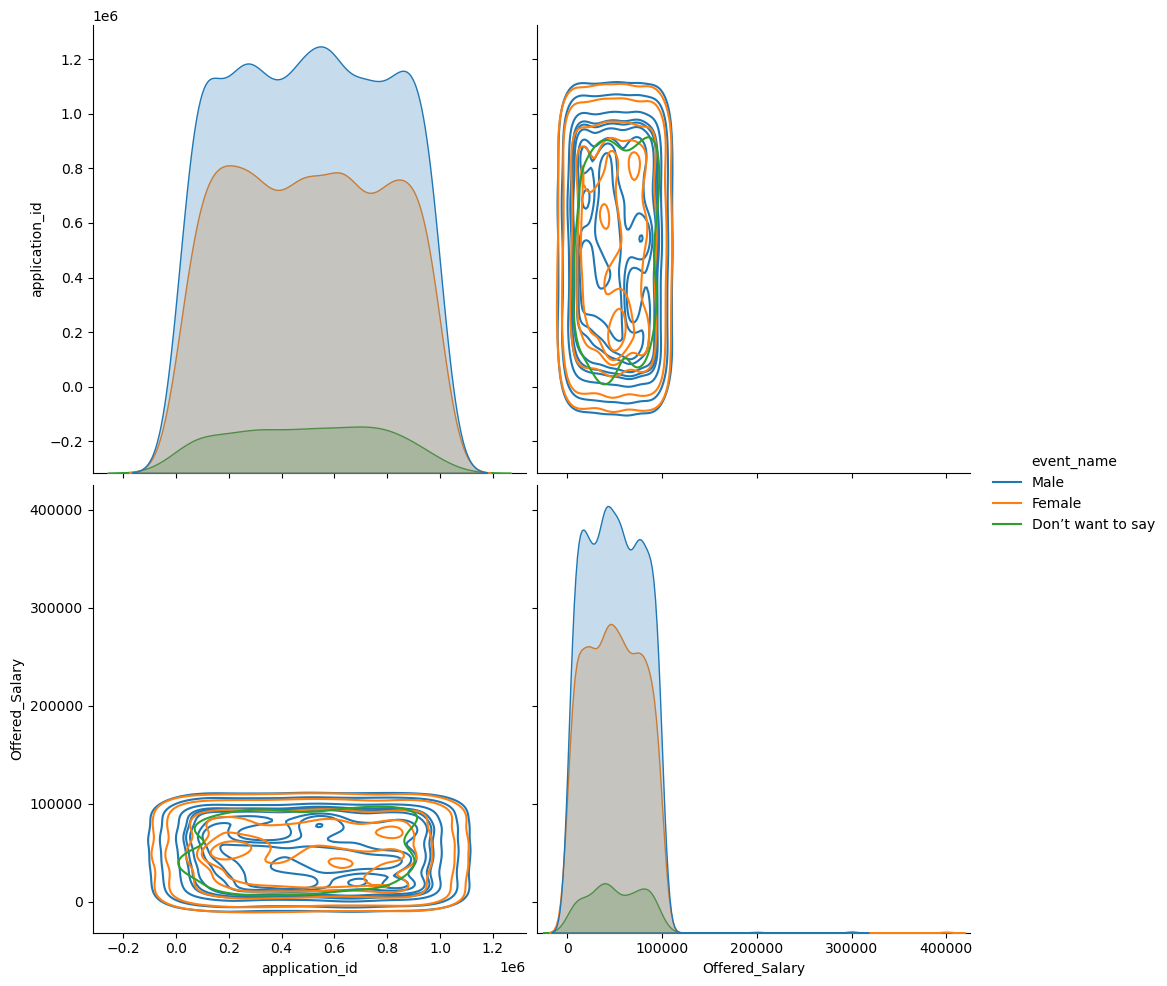

In [29]:
#plot different relations in the dataset 
sns.pairplot(c,hue="event_name",kind="kde",height=5)
plt.show()